<a href="https://colab.research.google.com/github/keysyaa26/segmentasi-marbling-daging/blob/main/image_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg \
    -O noidea.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

import cv2 as cv2
import numpy as np
import common
from google.colab.patches import cv2_imshow as cv2_imshow
from matplotlib import pyplot as plt
%matplotlib inline
import pylab
print(cv2.__version__)

--2025-02-19 06:46:20--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70503 (69K) [image/jpeg]
Saving to: ‘noidea.jpg’

noidea.jpg          100%[===================>]  68.85K  --.-KB/s    in 0.02s   

2025-02-19 06:46:20 (3.38 MB/s) - ‘noidea.jpg’ saved [70503/70503]

--2025-02-19 06:46:20--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

In [ ]:
# import file
from google.colab import drive
drive.mount ('/content/drive', force_remount=True)
%cd "/content/drive/MyDrive/Foto Daging 126"
!ls

Mounted at /content/drive
/content/drive/MyDrive/Foto Daging 126
common.py     IMG_2241	    IMG_2244.JPG  IMG_2262	IMG_2265.JPG  IMG_2269	    IMG_2272.JPG
IMG_2238      IMG_2241.JPG  IMG_2245	  IMG_2262.JPG	IMG_2266      IMG_2269.JPG  noidea.jpg
IMG_2238.JPG  IMG_2242	    IMG_2245.JPG  IMG_2263	IMG_2266.JPG  IMG_2270	    __pycache__
IMG_2239      IMG_2242.JPG  IMG_2246	  IMG_2263.JPG	IMG_2267      IMG_2270.JPG
IMG_2239.JPG  IMG_2243	    IMG_2246.JPG  IMG_2264	IMG_2267.JPG  IMG_2271
IMG_2240      IMG_2243.JPG  IMG_2247	  IMG_2264.JPG	IMG_2268      IMG_2271.JPG
IMG_2240.JPG  IMG_2244	    IMG_2247.JPG  IMG_2265	IMG_2268.JPG  IMG_2272


# Next step: image processing pakai openCV

[[[ 82  27 130]
  [ 85  30 133]
  [ 80  24 129]
  ...
  [ 30  32   2]
  [ 31  35   0]
  [ 30  34   0]]

 [[ 84  29 132]
  [ 88  33 136]
  [ 79  23 128]
  ...
  [ 29  31   1]
  [ 31  34   2]
  [ 30  33   1]]

 [[ 80  25 128]
  [ 83  28 131]
  [ 79  23 128]
  ...
  [ 28  30   1]
  [ 30  33   1]
  [ 30  33   1]]

 ...

 [[128  48 125]
  [135  55 132]
  [124  50 122]
  ...
  [ 87  34  84]
  [ 93  41  89]
  [ 91  39  87]]

 [[135  50 132]
  [145  60 140]
  [141  61 138]
  ...
  [ 84  30  83]
  [ 93  40  90]
  [ 92  39  89]]

 [[143  53 136]
  [141  54 134]
  [142  58 136]
  ...
  [ 88  31  86]
  [ 91  37  90]
  [ 93  39  92]]]
(3456, 5184, 3)
53747712
uint8


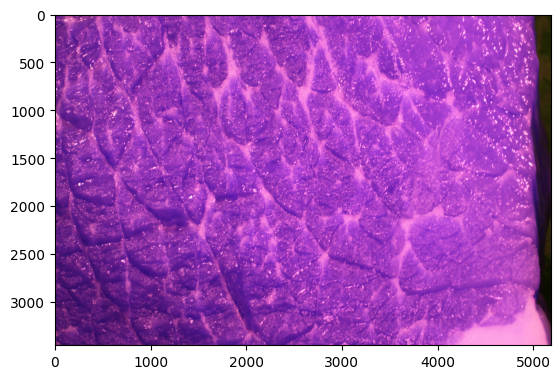

In [ ]:
daging = cv2.imread('/content/drive/MyDrive/Foto Daging 126/IMG_2242.JPG')
print(daging)
print(daging.shape)
print(daging.size)
print(daging.dtype)
plt.imshow(daging)

[[[130  27  82]
  [133  30  85]
  [129  24  80]
  ...
  [  2  32  30]
  [  0  35  31]
  [  0  34  30]]

 [[132  29  84]
  [136  33  88]
  [128  23  79]
  ...
  [  1  31  29]
  [  2  34  31]
  [  1  33  30]]

 [[128  25  80]
  [131  28  83]
  [128  23  79]
  ...
  [  1  30  28]
  [  1  33  30]
  [  1  33  30]]

 ...

 [[125  48 128]
  [132  55 135]
  [122  50 124]
  ...
  [ 84  34  87]
  [ 89  41  93]
  [ 87  39  91]]

 [[132  50 135]
  [140  60 145]
  [138  61 141]
  ...
  [ 83  30  84]
  [ 90  40  93]
  [ 89  39  92]]

 [[136  53 143]
  [134  54 141]
  [136  58 142]
  ...
  [ 86  31  88]
  [ 90  37  91]
  [ 92  39  93]]]
uint8


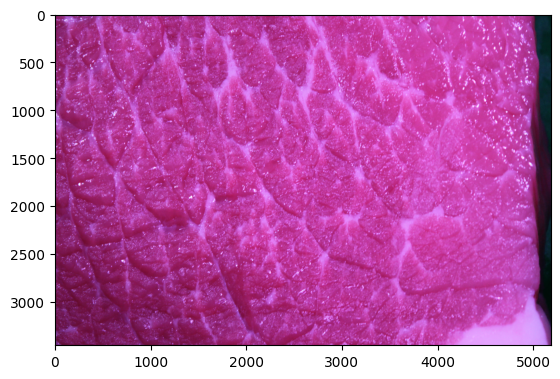

In [ ]:
daging = plt.imread('/content/drive/MyDrive/Foto Daging 126/IMG_2242.JPG')
plt.imshow(daging)
print(daging)
print(daging.dtype)

[[ 82  85  80 ...  30  31  30]
 [ 84  88  79 ...  29  31  30]
 [ 80  83  79 ...  28  30  30]
 ...
 [128 135 124 ...  87  93  91]
 [135 145 141 ...  84  93  92]
 [143 141 142 ...  88  91  93]]


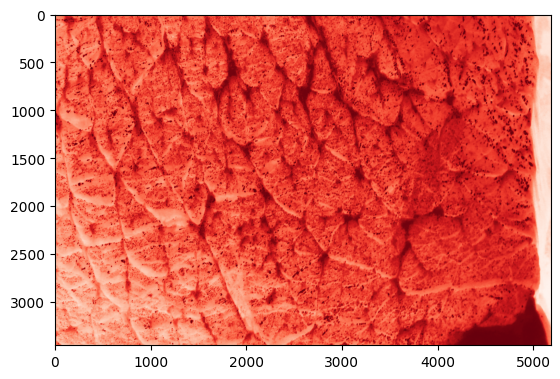

In [ ]:
# split channels
b, g, r = cv2.split(daging)
# plt.imshow(b, cmap='Blues')
# plt.imshow(g, cmap='Greens')
plt.imshow(r, cmap='Reds')
print(r)

## convert colour space, merge, split channel

[[[ 82  27 130]
  [ 85  30 133]
  [ 80  24 129]
  ...
  [ 30  32   2]
  [ 31  35   0]
  [ 30  34   0]]

 [[ 84  29 132]
  [ 88  33 136]
  [ 79  23 128]
  ...
  [ 29  31   1]
  [ 31  34   2]
  [ 30  33   1]]

 [[ 80  25 128]
  [ 83  28 131]
  [ 79  23 128]
  ...
  [ 28  30   1]
  [ 30  33   1]
  [ 30  33   1]]

 ...

 [[128  48 125]
  [135  55 132]
  [124  50 122]
  ...
  [ 87  34  84]
  [ 93  41  89]
  [ 91  39  87]]

 [[135  50 132]
  [145  60 140]
  [141  61 138]
  ...
  [ 84  30  83]
  [ 93  40  90]
  [ 92  39  89]]

 [[143  53 136]
  [141  54 134]
  [142  58 136]
  ...
  [ 88  31  86]
  [ 91  37  90]
  [ 93  39  92]]]


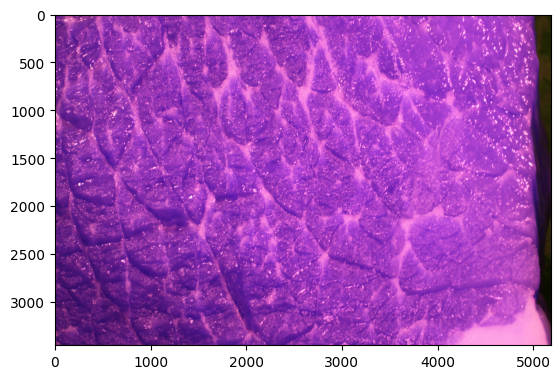

In [ ]:
daging_merged = cv2.merge([r,g,b])
plt.imshow(daging_merged)
print(daging_merged)

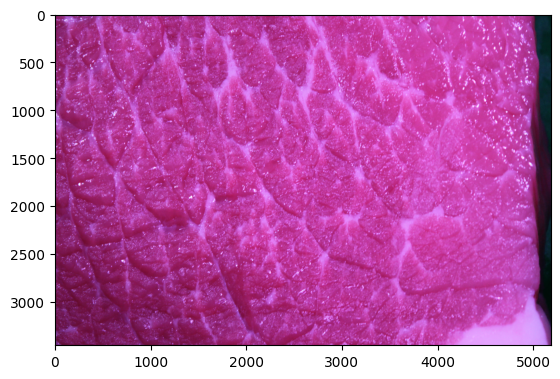

In [ ]:
daging = cv2.imread('/content/drive/MyDrive/Foto Daging 126/IMG_2242.JPG')
opencv_merged = cv2.cvtColor(daging, cv2.COLOR_BGR2RGB)
plt.imshow(opencv_merged)

## get and set data pixel gambar

In [ ]:
pixel = opencv_merged[3000,500]
print(pixel)

[106  23  79]


In [ ]:
opencv_merged[100,100] = [0,0,0]
newPixel = opencv_merged[100,100]
print(newPixel)

[0 0 0]


## set dan get region gambar

[[[195  54 150]
  [198  54 151]
  [201  57 154]
  ...
  [212  62 169]
  [210  61 165]
  [212  63 167]]

 [[191  51 147]
  [194  53 149]
  [197  53 150]
  ...
  [212  62 170]
  [209  59 166]
  [208  58 165]]

 [[188  48 144]
  [193  52 146]
  [192  51 147]
  ...
  [212  62 172]
  [212  62 170]
  [209  59 167]]

 ...

 [[186  44 142]
  [188  46 144]
  [186  46 143]
  ...
  [199  55 150]
  [191  48 140]
  [188  45 137]]

 [[186  44 142]
  [186  44 142]
  [185  45 142]
  ...
  [191  50 144]
  [189  46 138]
  [191  48 140]]

 [[191  49 147]
  [189  45 143]
  [185  45 142]
  ...
  [186  47 140]
  [189  48 140]
  [190  49 141]]]


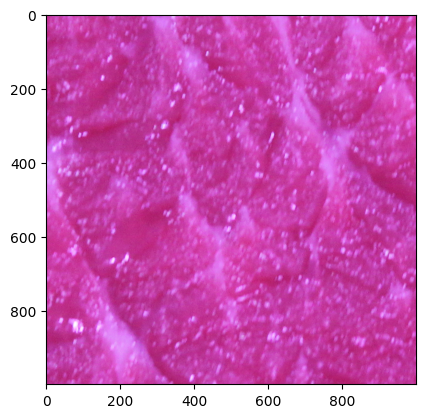

In [ ]:
cropped = daging[1000:2000, 2000:3000]
plt.imshow(cropped)
print(cropped)

## matrix slicing

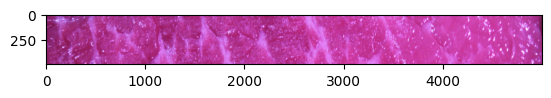

In [ ]:
cropped2 = cv2.imread('/content/drive/MyDrive/Foto Daging 126/IMG_2242.JPG')[0:500,0:5000]
cropped_convert = cv2.cvtColor(cropped2, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_convert)

[[184  55 155]]


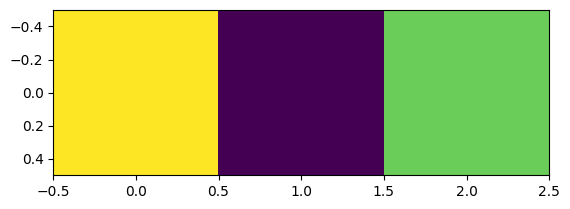

In [ ]:
pixel = cropped_convert[250,2000]
# ubah jadi array numpy
pixel_array = np.array([pixel])
print(pixel_array)
plt.imshow(pixel_array)

# image processing dan stats

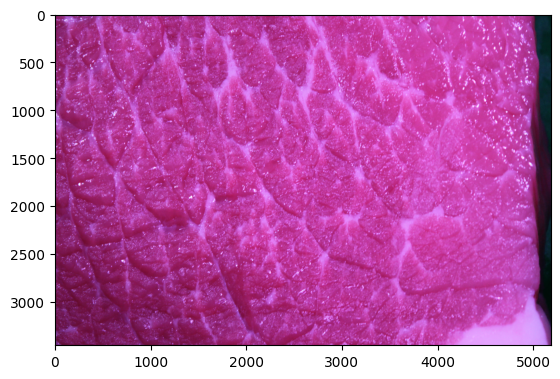

In [ ]:
gambar_daging = cv2.imread('/content/drive/MyDrive/Foto Daging 126/IMG_2242.JPG')
gambar_daging = cv2.cvtColor(gambar_daging, cv2.COLOR_BGR2RGB)
plt.imshow(gambar_daging)

## Rotate, flip

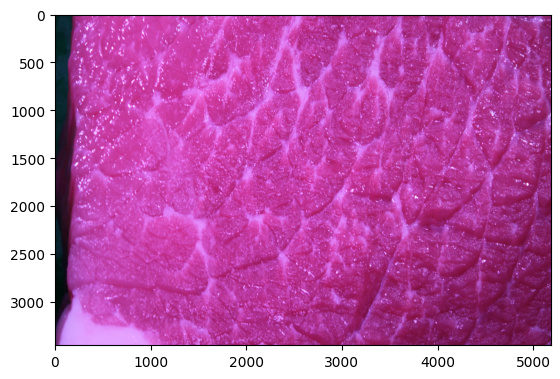

In [ ]:
flip_hor = cv2.flip(gambar_daging,1)
plt.imshow(flip_hor)

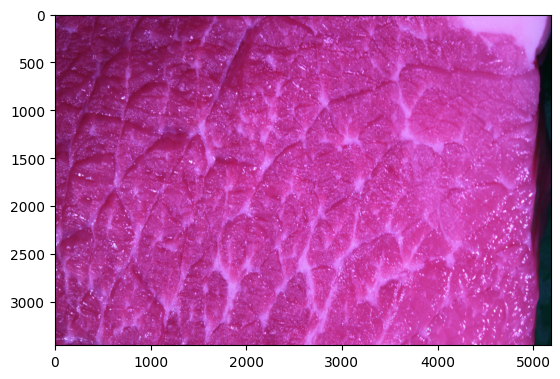

In [ ]:
flip_ver = cv2.flip(gambar_daging,0)
plt.imshow(flip_ver)

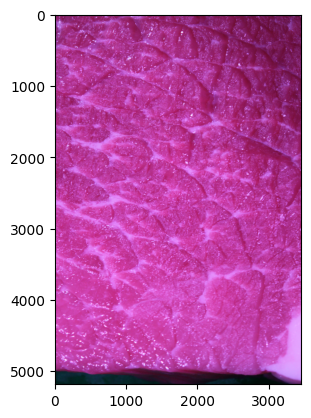

In [ ]:
transposed = cv2.transpose(gambar_daging)
plt.imshow(transposed)

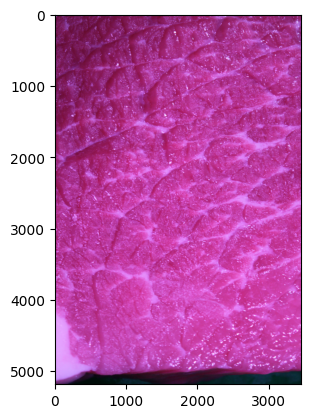

In [ ]:
# rotasi 90 derajat searah jarum jam (tanspose dan flip horizontal)
rotated = cv2.rotate(gambar_daging, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(rotated)

## minimum max

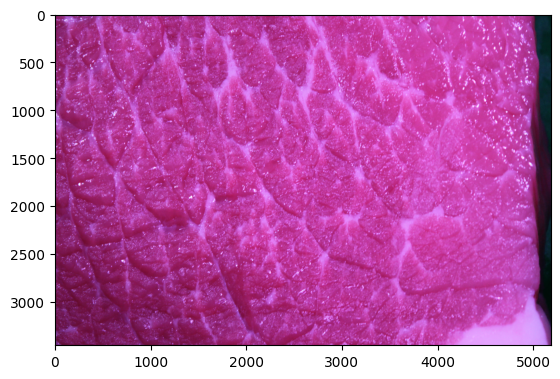

In [ ]:
# ubah ke greyscale dulu
gambar_daging = cv2.imread('/content/drive/MyDrive/Foto Daging 126/IMG_2242.JPG')
gambar_daging = cv2.cvtColor(gambar_daging, cv2.COLOR_BGR2RGB)
gambar_daging = cv2.cvtColor(gambar_daging, cv2.IMREAD_GRAYSCALE)
plt.imshow(gambar_daging, cmap='gray')

In [ ]:
for i in range(0,3):
   min_value, max_value, min_location, max_location=cv2.minMaxLoc(gambar_daging[:,:,i])
   print("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))


min 0.0 is at (5060, 0), and max 255.0 is at (4384, 0)
min 0.0 is at (1112, 88), and max 255.0 is at (4388, 0)
min 5.0 is at (5167, 2960), and max 255.0 is at (2880, 0)


## operasi aritmatika
timpa gambar potongan ke gambar full

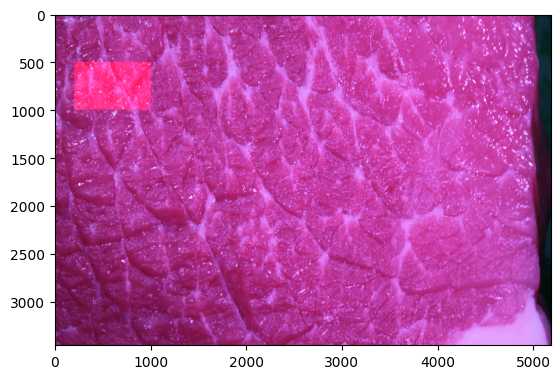

In [ ]:
gambar_crop = np.zeros((gambar_daging.shape), dtype=np.uint8)
gambar_crop[500:1000,200:1000,0] = 100
# add ke gambar full
new_image = cv2.add(gambar_crop, gambar_daging)
plt.imshow(new_image)

## noise reduction

[[[ 82  27 130]
  [ 85  30 133]
  [ 80  24 129]
  ...
  [ 30  32   2]
  [ 31  35   0]
  [ 30  34   0]]

 [[ 84  29 132]
  [ 88  33 136]
  [ 79  23 128]
  ...
  [ 29  31   1]
  [ 31  34   2]
  [ 30  33   1]]

 [[ 80  25 128]
  [ 83  28 131]
  [ 79  23 128]
  ...
  [ 28  30   1]
  [ 30  33   1]
  [ 30  33   1]]

 ...

 [[128  48 125]
  [135  55 132]
  [124  50 122]
  ...
  [ 87  34  84]
  [ 93  41  89]
  [ 91  39  87]]

 [[135  50 132]
  [145  60 140]
  [141  61 138]
  ...
  [ 84  30  83]
  [ 93  40  90]
  [ 92  39  89]]

 [[143  53 136]
  [141  54 134]
  [142  58 136]
  ...
  [ 88  31  86]
  [ 91  37  90]
  [ 93  39  92]]]
[[[123  46 145]
  [123  46 145]
  [123  46 145]
  ...
  [ 47  40  10]
  [ 47  40  10]
  [ 46  40  10]]

 [[123  47 145]
  [124  47 145]
  [124  47 145]
  ...
  [ 47  40  10]
  [ 47  40  10]
  [ 46  40  10]]

 [[124  47 145]
  [124  47 145]
  [124  47 146]
  ...
  [ 47  40  10]
  [ 47  40  10]
  [ 47  40  10]]

 ...

 [[ 77  23 106]
  [ 78  23 106]
  [ 78  23 106]
  ..

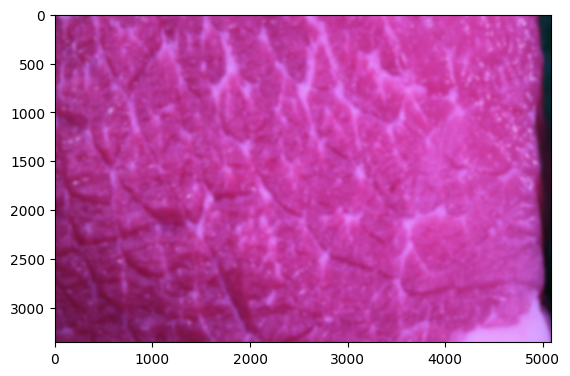

In [ ]:
d=50
img_blur = cv2.GaussianBlur(daging, (2*d+1, 2*d+1),-1)[d:-d,d:-d]
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
print(daging)
print(img_blur)

## tepian (edges)

[[   0. -318. -464. ...   92.   66.    0.]
 [   0. -287. -426. ...  104.   77.    0.]
 [   0. -182. -277. ...  114.   90.    0.]
 ...
 [   0. -114. -477. ...  328.  229.    0.]
 [   0.  -50. -522. ...  358.  326.    0.]
 [   0.    2. -488. ...  366.  350.    0.]]


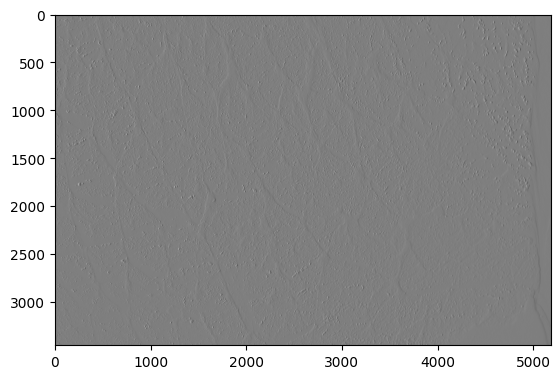

In [ ]:
sobelimage = cv2.cvtColor(daging, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(sobelimage, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(sobelimage, cv2.CV_64F, 0, 1, ksize=5)
plt.imshow(sobelx, cmap='gray')
print(sobelx)

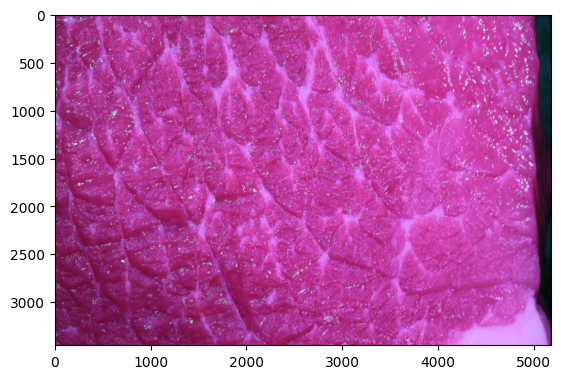

In [ ]:
th1 = 50
th2 = 100
d = 3

edgeresult = daging.copy()
edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

gray = cv2.cvtColor(edgeresult, cv2.COLOR_BGR2GRAY)

edge = cv2.Canny(gray, th1, th2)

edgeresult[edge != 0] = (0, 255, 0) # this takes pixels in edgeresult where edge non-zero colours them bright green

plt.imshow(cv2.cvtColor(edgeresult, cv2.COLOR_BGR2RGB))

# Features
untuk menemukan lokasi gambar yang khas. Ada banyak detektor fitur yang berbeda dan semuanya memiliki beberapa karakteristik yang sama: detektor harus cepat ditemukan, dan hal-hal yang dekat dalam ruang gambar juga dekat dalam ruang fitur (yaitu, representasi fitur suatu objek tampak seperti representasi fitur objek yang tampak seperti objek tersebut)

## deteksi sudut pakai algoritma harris corner detection
1. ubah ke greyscale
2. ubah data jadi float32
3. set parameter, running haris corner detector
6. visualisasi

In [ ]:


input_gambar = cv2.imread('/content/drive/MyDrive/Foto Daging 126/IMG_2242.JPG')

image_test = input_gambar.copy()
# greyscale gambar
image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)

image_test = np.float32(image_test)

block=4
kernel_size=3

# harris corner detector
dst = cv2.cornerHarris(image_test, block,kernel_size, 0.05)
dst = cv2.dilate(dst, None)
image_test[dst>0.01*dst.max()]=[0,0,255]

image_test_color = cv2.cvtColor(image_test.astype(np.uint8), cv2.COLOR_GRAY2BGR)
plt.imshow(cv2.cvtColor(image_test_color, cv2.COLOR_BGR2RGB))

ValueError: NumPy boolean array indexing assignment cannot assign 3 input values to the 92231 output values where the mask is true

## matching area

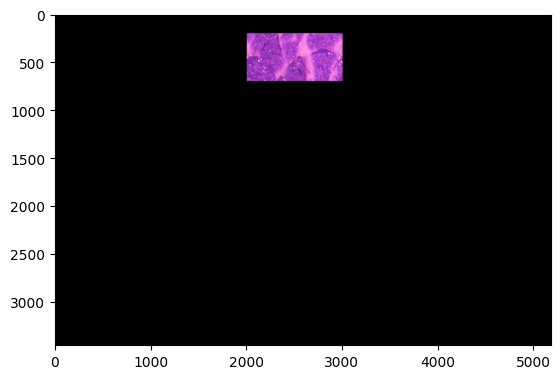

In [ ]:
# input_gambar = cv2.cvtColor(input_gambar, cv2.COLOR_BGR2RGB)
img2match = np.zeros(input_gambar.shape, np.uint8)
area_daging = input_gambar[500:1000, 2000:3000]
area_daging = cv2.flip(area_daging,0)

img2match[500:1000, 2000:3000] = [0,0,0] #blank region yang dipilih

img2match[200:200+area_daging.shape[0], 2000:2000+area_daging.shape[1]] = area_daging #put in random place
plt.imshow(cv2.cvtColor(img2match, cv2.COLOR_BGR2RGB))